In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [13]:
import torch
import torch.nn.functional as F
from torch import nn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_model(model_path, model_class, *model_args):
    """
    Carrega um modelo salvo em um arquivo .pth.

    Args:
        model_path (str): Caminho para o arquivo .pth.
        model_class (class): Classe do modelo que será instanciada.
        *model_args: Argumentos para a inicialização do modelo.

    Returns:
        torch.nn.Module: Modelo carregado.
    """
    model = model_class(*model_args)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model



In [11]:
class MLPClassification(nn.Module):
  def __init__(self,entrada):
    super().__init__()


    self.layers = nn.Sequential(
        nn.Linear(entrada,10),
        nn.ReLU(),
        nn.Linear(10,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layers(x)

In [17]:

entrada = 100*100
model = load_model("model/10_neuronios.pth",MLPClassification,entrada).to("cuda")

In [19]:
teste = torch.load("data/teste.pt")

In [21]:

from torch.utils.data import Dataset, DataLoader

In [22]:
class CustomDataset(Dataset):
    def __init__(self, data_tensor, transform=None):
        self.data = data_tensor
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Obtendo a imagem (vetor) e o rótulo (target) da linha idx do tensor
        image = self.data[idx, 1:-1]
        label = self.data[idx, -1].long()

        # Aplicando transformações, se necessário
        if self.transform:
            image = self.transform(image)

        return image, label


In [23]:
dataset_teste = CustomDataset(teste)
batch_size = 128  
test_dataloader = DataLoader(dataset_teste, batch_size=batch_size, shuffle=True)

In [29]:
test_dataloader

In [30]:
def plot_confusion_matrix(model, dataloader, device, threshold=0.8, classes=['Negativo', 'Positivo'], normalize=False, cmap=plt.cm.Blues):
    """
    Plota a matriz de confusão para um modelo com um DataLoader.

    Args:
        model (torch.nn.Module): Modelo carregado.
        dataloader (torch.utils.data.DataLoader): DataLoader contendo os dados de teste.
        device (str): Dispositivo para realizar a inferência ('cpu' ou 'cuda').
        threshold (float): Limiar para converter probabilidades em classes binárias.
        classes (list): Lista de rótulos das classes.
        normalize (bool): Se True, a matriz de confusão será normalizada.
        cmap (matplotlib.colors.Colormap): Mapa de cores para a plotagem.

    Returns:
        None
    """
    model.to(device)
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.sigmoid(outputs)
            preds = (probs >= threshold).int().squeeze().cpu().numpy()
            y_true.extend(labels.squeeze().cpu().numpy())
            y_pred.extend(preds)

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title('Matriz de Confusão')
    plt.xlabel('Rótulo Previsto')
    plt.ylabel('Rótulo Verdadeiro')
    plt.show()

# Exemplo de uso
# Supondo que você tenha o modelo e o DataLoader
# Substitua `model`, `test_dataloader` e outros parâmetros conforme necessário

# Defina os rótulos das classes
classes = ['Negativo', 'Positivo']

# Exemplo de uso
# Substitua `YourModelClass` pela classe real do seu modelo
# model = load_model('model.pth', YourModelClass)
# cm = confusion_matrix_from_dataloader(model, test_dataloader, threshold=0.8, device='cuda')
# print(cm)


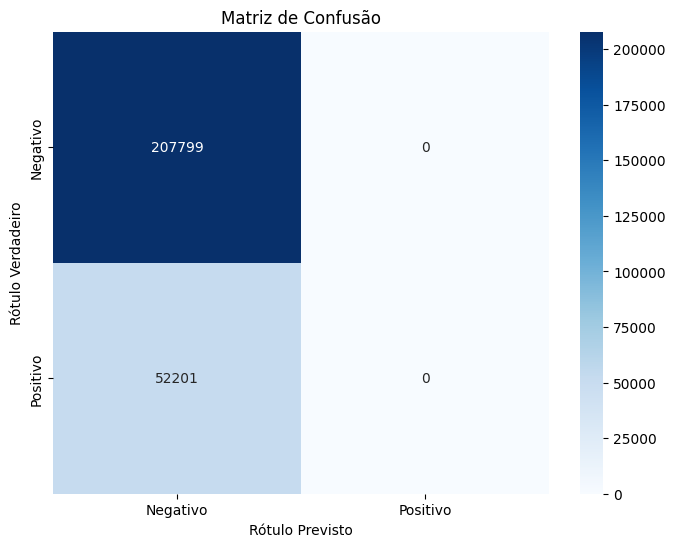

None


In [35]:
cm = plot_confusion_matrix(model, test_dataloader, device='cuda', threshold=0.72)
print(cm)